## Player Attrition in the Gaming Industry.
The primary objective of this project is to develop a churn detection system using supervised learning techniques. The system will detect potential churn among game players and serve as a foundational baseline model for future enhancements with advanced techniques like deep learning.

## Problem Statement
The gaming industry is highly competitive,hence player retention is crucial for maintaining active user engagement and driving revenue growth.However, predicting player churn is a complex challenge due to the diverse factors influencing user behavior, such as gameplay patterns, session frequency, and in-game purchases. This project seeks to address the problem of accurately predicting player churn by developing a supervised machine learning model that identifies users at high risk of attrition. By identifying potential churners early, this model can enable timely interventions to enhance player retention and inform data-driven strategies for user engagement.

### Key Steps in the Project

#### 1. Import Libraries and Data Collection
- Load the dataset containing the gaming data.
- Ensure the data is correctly imported into the environment, addressing any file format or loading issues.

#### 2. Data Exploration, Preprocessing, and Exploratory Data Analysis (EDA)
- Perform detailed exploratory data analysis (EDA) to investigate the distributions of various features.
- Detect potential outliers and handle any missing values.
- Gain insights into patterns or relationships between variables relevant to player attrition.
- Address class imbalance between churn and non-churn cases.

#### 3. Data Transformation and Feature Engineering
- Apply necessary transformations to the data, such as normalization.
- Encode categorical variables.
- Create new features that can enhance the model's predictive performance.

#### 4. Model Selection, Model Training, and Model Evaluation
- Select appropriate supervised learning algorithms.
- Train the models using the prepared dataset.
- Evaluate model performance using metrics such as accuracy, precision, recall, and F1-score.

#### 5. Model Deployment
- Develop and deploy a web-based churn prediction system using FastAPI.
- Create an API that accepts new data and returns predictions on whether the user will churn.


### Methodology
This project will follow the CRISP-DM (Cross Industry Standard Process for Data Mining) methodology, a widely used approach in data science. It is characterized by six key phases:

1. **Business Understanding**: Define the objectives and requirements of the project from a business perspective.
2. **Data Understanding**: Collect, describe, and explore the data to gain initial insights and identify quality issues.
3. **Data Preparation**: Clean, transform, and prepare the data for modeling.
4. **Data Modeling**: Select and apply appropriate modeling techniques to the prepared data.
5. **Data Evaluation**: Assess the model to ensure it meets business objectives.
6. **Data Deployment**: Implement the model for practical use, integrating it into the business environment.

> **Note**: These phases are often iterative and do not follow a strictly linear progression.

---

### Tools
The following tools were used in this project:

- **Pandas**: For data manipulation and analysis.
- **NumPy**: For numerical operations and handling arrays.
- **Seaborn**: For statistical data visualization.
- **Matplotlib**: For general data visualization.
- **Scikit-Learn**: For machine learning modeling and evaluation.

### Hypotheses Generation

1. **Higher Average Attempt Duration Indicates Lower Retention**  
   - Players who take significantly longer to complete levels may find the game challenging or tedious, which could increase their likelihood of churning.

2. **Low Clearance Rates Correlate with Churn**  
   - Players with low average clearance rates might get discouraged by frequent failures, potentially leading to a higher chance of churn.

3. **Frequent Use of Extra Help May Decrease Churn**  
   - Players who frequently use extra help tools might be more likely to continue playing, as these tools assist them in overcoming challenging levels.

4. **Longer Attempt Durations in Early Levels Predict Churn**  
   - Players who take more time on initial levels may be struggling or losing interest early on, indicating a higher probability of attrition.

5. **Low Retry Counts are Associated with Churn**  
   - Players who attempt fewer retries might lose interest quickly, reflecting lower engagement and an increased likelihood to churn.



### Data Dictionary

| Column                | Description                                                                                                   |
|-----------------------|---------------------------------------------------------------------------------------------------------------|
| `user_id`             | Unique identifier for each user.                                                                             |
| `level_id`            | Identifier for each level in the game.                                                                        |
| `attempt_result`      | Indicates whether the user completed the level (`1`: completed, `0`: failed).                                |
| `attempt_duration`    | Duration of the attempt (in seconds).                                                                         |
| `f_reststep`          | Ratio of remaining steps to limited steps (if the attempt fails, this value is `0`).                         |
| `f_help`              | Indicates if extra help (e.g., props, hints) was used (`1`: used, `0`: not used).                            |
| `time`                | Timestamp indicating when the attempt was made.                                                               |
| `avg_attempt_duration`| Average time spent on each attempt (in seconds, includes both successful and failed attempts).                |
| `avg_clearance_duration` | Average time spent on each level clearance (in seconds, includes only successful attempts).              |
| `avg_num_retries`     | Average number of retries (e.g., the second time a user plays the same level counts as the first retry).      |
| `label`               | Indicates churn status (`0`: non-churn, `1`: churn).                                                         |


In [2]:
# -------------------------- Import Libraries --------------------------

# General libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import warnings

# Machine Learning libraries
from sklearn.model_selection import (
    train_test_split,
    RandomizedSearchCV,
    cross_val_score,
)
from sklearn.preprocessing import (
    StandardScaler,
    OneHotEncoder,
)
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBRegressor
from sklearn.metrics import (
    mean_squared_error,
    r2_score,
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    confusion_matrix,
    classification_report,
    ConfusionMatrixDisplay,
    roc_curve,
    auc,
    roc_auc_score,
)
from sklearn.compose import ColumnTransformer
from sklearn.feature_selection import (
    VarianceThreshold,
    SelectKBest,
    chi2,
)
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from imblearn.over_sampling import SMOTE
import joblib
import os
import gc #garbage collection
sns.set()  #this helps us set a visual theme. It ensures our data is visualized in an aesthetically pleasing way
# Set up warnings filter and seaborn style
warnings.filterwarnings("ignore")
sns.set(style="whitegrid")

# Optional: Adjust default figure size for plots
plt.rcParams['figure.figsize'] = [10, 6]


In [2]:
#setting seed for reproducibility
SEED = np.random.seed(seed = 2023)

In [4]:
#loading the dataset
data = pd.read_csv('churn_dataset.csv')
# Display the first few rows of the dataset
print("Dataset loaded successfully.")
data.head()

Dataset loaded successfully.


,user_id,level_id,attempt_result,attempt_duration,f_reststep,extra_help_used,time,avg_attempt_duration,avg_clearance_rate,avg_clearance_duration,avg_num_retries,label
0,10932,1,1,127.0,0.500000,0,2020-02-01 00:05:51,39.889940,0.944467,35.582757,0.017225,0.0
1,10932,2,1,69.0,0.703704,0,2020-02-01 00:08:01,60.683975,0.991836,56.715706,0.004638,0.0
2,10932,3,1,67.0,0.560000,0,2020-02-01 00:09:50,76.947355,0.991232,71.789943,0.004480,0.0
3,10932,4,1,58.0,0.700000,0,2020-02-01 00:11:16,58.170347,0.993843,54.842882,0.004761,0.0
4,10932,5,1,83.0,0.666667,0,2020-02-01 00:13:12,101.784577,0.954170,85.650547,0.027353,0.0


In [6]:
# Display general information about the dataset (data types, non-null values, etc.)
print("\nDataset Information:")
print(data.info())


Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1755675 entries, 0 to 1755674
Data columns (total 12 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   user_id                 int64  
 1   level_id                int64  
 2   attempt_result          int64  
 3   attempt_duration        float64
 4   f_reststep              float64
 5   extra_help_used         int64  
 6   time                    object 
 7   avg_attempt_duration    float64
 8   avg_clearance_rate      float64
 9   avg_clearance_duration  float64
 10  avg_num_retries         float64
 11  label                   float64
dtypes: float64(7), int64(4), object(1)
memory usage: 160.7+ MB
None


In [7]:
data.shape

(1755675, 12)

In [9]:
# Display basic statistics of the numerical features
data.describe()

,user_id,level_id,attempt_result,attempt_duration,f_reststep,extra_help_used,avg_attempt_duration,avg_clearance_rate,avg_clearance_duration,avg_num_retries,label
count,1.755675e+06,1.755675e+06,1.755675e+06,1.755675e+06,1.755675e+06,1.755675e+06,1.755675e+06,1.755675e+06,1.755675e+06,1.755675e+06,1.755675e+06
mean,8.099337e+03,9.722270e+01,5.273476e-01,1.080458e+02,1.677537e-01,4.400815e-02,3.118494e+02,6.850911e-01,1.111612e+02,1.243980e+00,1.815769e-01
std,3.176117e+03,8.282797e+01,4.992517e-01,5.359588e+01,2.262675e-01,2.051133e-01,1.887533e+02,2.062641e-01,2.263581e+01,1.484613e+00,3.854955e-01
min,2.774000e+03,1.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,3.988994e+01,3.333333e-02,3.558276e+01,0.000000e+00,0.000000e+00
25%,5.347000e+03,4.100000e+01,0.000000e+00,7.700000e+01,0.000000e+00,0.000000e+00,1.728224e+02,5.224837e-01,1.001515e+02,1.570054e-01,0.000000e+00
50%,8.063000e+03,8.100000e+01,1.000000e+00,1.000000e+02,4.545455e-02,0.000000e+00,2.675890e+02,7.164306e-01,1.116680e+02,6.222222e-01,0.000000e+00
75%,1.090900e+04,1.430000e+02,1.000000e+00,1.270000e+02,2.857143e-01,0.000000e+00,4.238776e+02,8.466758e-01,1.242165e+02,1.848445e+00,0.000000e+00
max,1.358900e+04,1.509000e+03,1.000000e+00,6.000000e+02,1.000000e+00,1.000000e+00,2.076000e+03,1.000000e+00,2.639085e+02,1.800000e+01,1.000000e+00


In [10]:
# Display the counts of unique values in the 'label' column
label_distribution = data['label'].value_counts()
print("\nClass Distribution (0 = Non-churn, 1 = Churn):")
print(label_distribution)


Class Distribution (0 = Non-churn, 1 = Churn):
label
0.0    1436885
1.0     318790
Name: count, dtype: int64


In [19]:
# -------------------------- Step 2: Data Exploration, Preprocessing and Exploratory Data Analysis (EDA) --------------------------

# 1. Check for missing values and print the summary
missing_values = (data.isna().sum() * 100)/ len(data)
print("Missing Values in Each Feature:\n", missing_values[missing_values > 0])


# 2. Print the distribution of churn vs non-churn customers
label_distribution = data['label'].value_counts(normalize=True) * 100
print("\nlabel Distribution (%):")
print(f"Non-Churn Customers (0): {label_distribution[0]:.2f}%")
print(f"Churn Customers (1): {label_distribution[1]:.2f}%")


# 3. Print the overall data shape and information
print("\nData Shape:", data.shape)
print("\nData Information:")
print(data.info())

# 4. Convert the time column to date time
data['time'] = pd.to_datetime(data['time'],format="%Y-%m-%d %H:%M:%S")

# 5. extract year, month and day column
data['year'] = data['time'].dt.year
data['month'] = data['time'].dt.month
data['day'] = data['time'].dt.day

#6. check for duplicate records
num_duplicates = data.loc[data.duplicated()]
num_duplicates

#7. dropping duplicates and renaming dataset
df = data.drop_duplicates()
df.shape


Missing Values in Each Feature:
 Series([], dtype: float64)

label Distribution (%):
Non-Churn Customers (0): 81.84%
Churn Customers (1): 18.16%

Data Shape: (1755675, 15)

Data Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1755675 entries, 0 to 1755674
Data columns (total 15 columns):
 #   Column                  Dtype         
---  ------                  -----         
 0   user_id                 int64         
 1   level_id                int64         
 2   attempt_result          int64         
 3   attempt_duration        float64       
 4   f_reststep              float64       
 5   extra_help_used         int64         
 6   time                    datetime64[ns]
 7   avg_attempt_duration    float64       
 8   avg_clearance_rate      float64       
 9   avg_clearance_duration  float64       
 10  avg_num_retries         float64       
 11  label                   float64       
 12  year                    int32         
 13  month                   int32  

(1699820, 15)


Features Highly Correlated with Label (|Correlation| > 0.2): ['label']


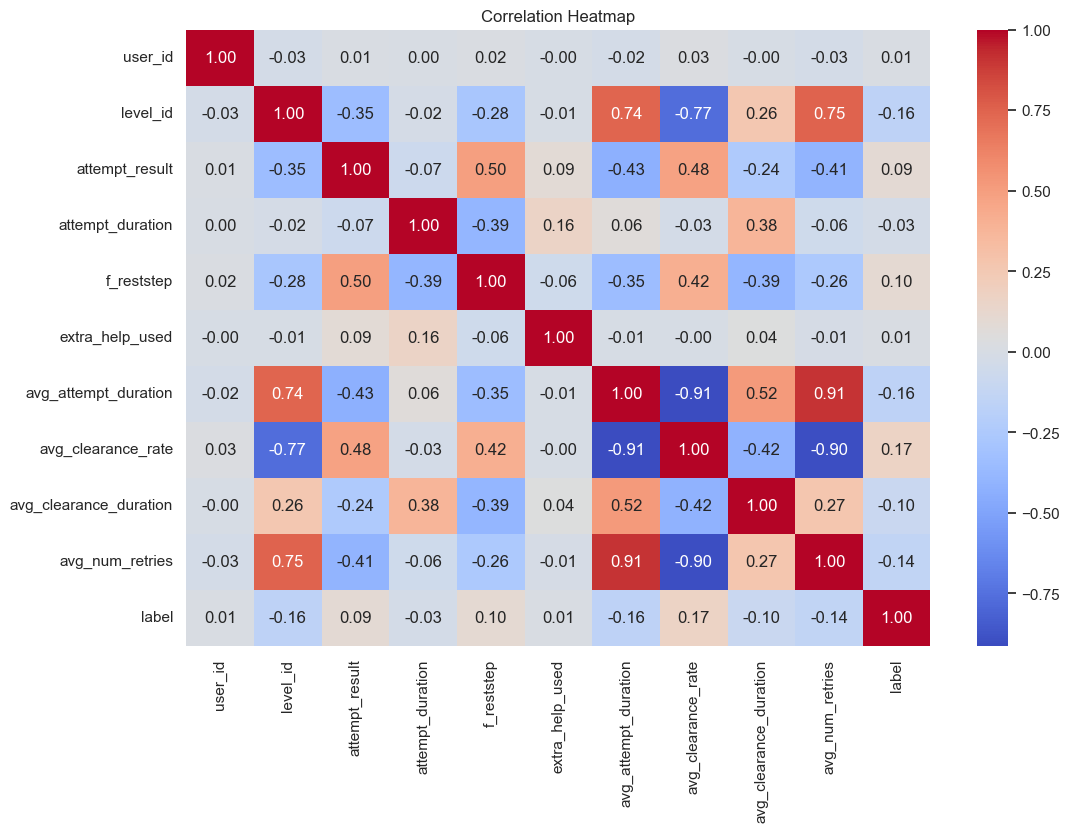

In [22]:
#Print correlation information for selected features
subset_df = df.drop(columns=['time', 'month','year', 'day'])
corr_matrix = subset_df.corr()
high_correlation = corr_matrix[corr_matrix['label'].abs() > 0.2].index.tolist()
print("\nFeatures Highly Correlated with Label (|Correlation| > 0.2):", high_correlation)
# Plotting the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

In [24]:
# Additional insights on the data
print("\nNumber of Unique Values per Feature:\n", df.nunique())


Number of Unique Values per Feature:
 user_id                    10816
level_id                    1295
attempt_result                 2
attempt_duration             600
f_reststep                   603
extra_help_used                2
time                      306832
avg_attempt_duration        1292
avg_clearance_rate          1270
avg_clearance_duration      1258
avg_num_retries             1134
label                          2
year                           1
month                          1
day                            4
dtype: int64


In [15]:
#analyzing the amount of time captured in the dataset
data['time'].max()

Timestamp('2020-02-04 23:59:59')

In [16]:
data['time'].min()

Timestamp('2020-02-01 00:00:20')

#### The time duration to ascertain game churn is within 4 days

#### Exploratory Data Analysis and Visualization

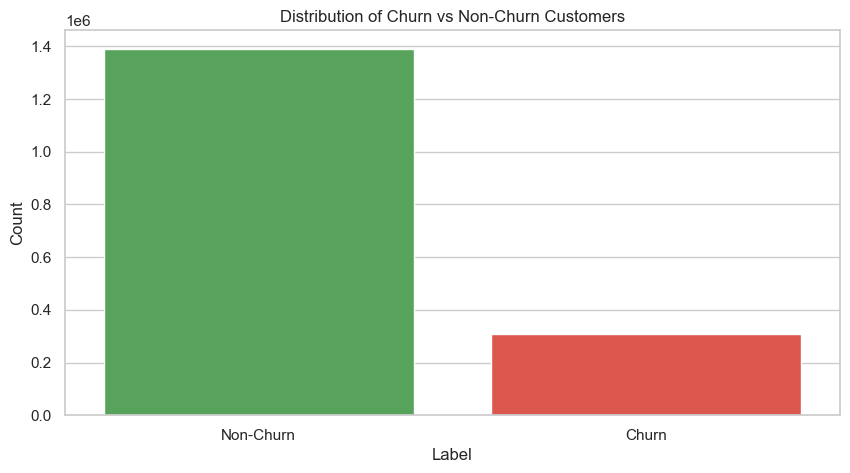

In [25]:
# 1. Distribution of churn vs non-churn customers
plt.figure(figsize=(10, 5))  # Set figure size
sns.countplot(x='label', data=df, palette=['#4CAF50', '#F44336'])  # Plot countplot for label column
plt.title('Distribution of Churn vs Non-Churn Customers')  # Set plot title
plt.xlabel('Label')  # Set x-axis label
plt.ylabel('Count')  # Set y-axis label
plt.xticks(ticks=[0, 1], labels=['Non-Churn', 'Churn'])  # Set x-axis tick labels
plt.show()  # Display the plot

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1699820 entries, 0 to 1755674
Data columns (total 15 columns):
 #   Column                  Dtype         
---  ------                  -----         
 0   user_id                 int64         
 1   level_id                int64         
 2   attempt_result          int64         
 3   attempt_duration        float64       
 4   f_reststep              float64       
 5   extra_help_used         int64         
 6   time                    datetime64[ns]
 7   avg_attempt_duration    float64       
 8   avg_clearance_rate      float64       
 9   avg_clearance_duration  float64       
 10  avg_num_retries         float64       
 11  label                   float64       
 12  year                    int32         
 13  month                   int32         
 14  day                     int32         
dtypes: datetime64[ns](1), float64(7), int32(3), int64(4)
memory usage: 188.0 MB


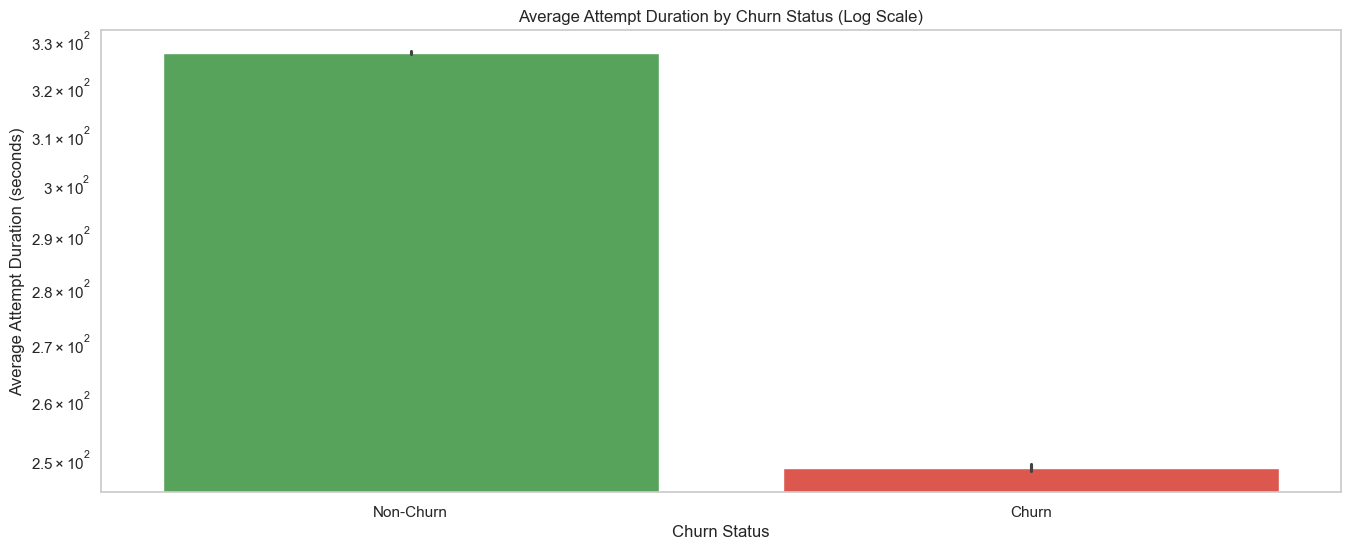

In [29]:
# 2. Distribution of attempt duration for non churn vs churn
plt.figure(figsize=(16, 6))  # Set figure size
sns.barplot(x='label', y='avg_attempt_duration', data=df, palette=['#4CAF50', '#F44336'])

# Set plot attributes
plt.yscale('log')  # Log scale to handle skewness
plt.title('Average Attempt Duration by Churn Status (Log Scale)')  # Set plot title
plt.xlabel('Churn Status')  # Set x-axis label
plt.ylabel('Average Attempt Duration (seconds)')  # Set y-axis label
plt.xticks(ticks=[0, 1], labels=['Non-Churn', 'Churn'])  # Set x-axis tick labels

# Display the plot
plt.show()

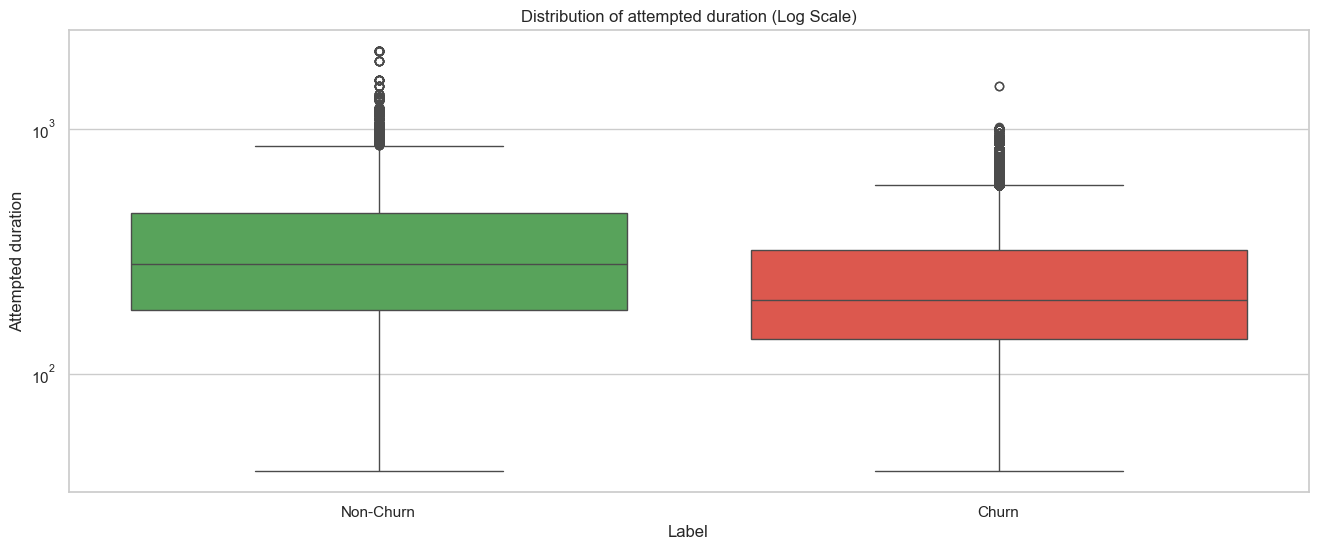

In [28]:
# 2. Distribution of attempted duration for non churn vs churn
plt.figure(figsize=(16, 6))  # Set figure size
sns.boxplot(x='label', y='avg_attempt_duration', data=df, palette=['#4CAF50', '#F44336'])
plt.yscale('log')  # Log scale to handle skewness
plt.title('Distribution of attempted duration (Log Scale)')  # Set plot title
plt.xlabel('Label')  # Set x-axis label
plt.ylabel('Attempted duration')  # Set y-axis label
plt.xticks(ticks=[0, 1], labels=['Non-Churn', 'Churn'])  # Set x-axis tick labels
plt.show()  # Display the plot

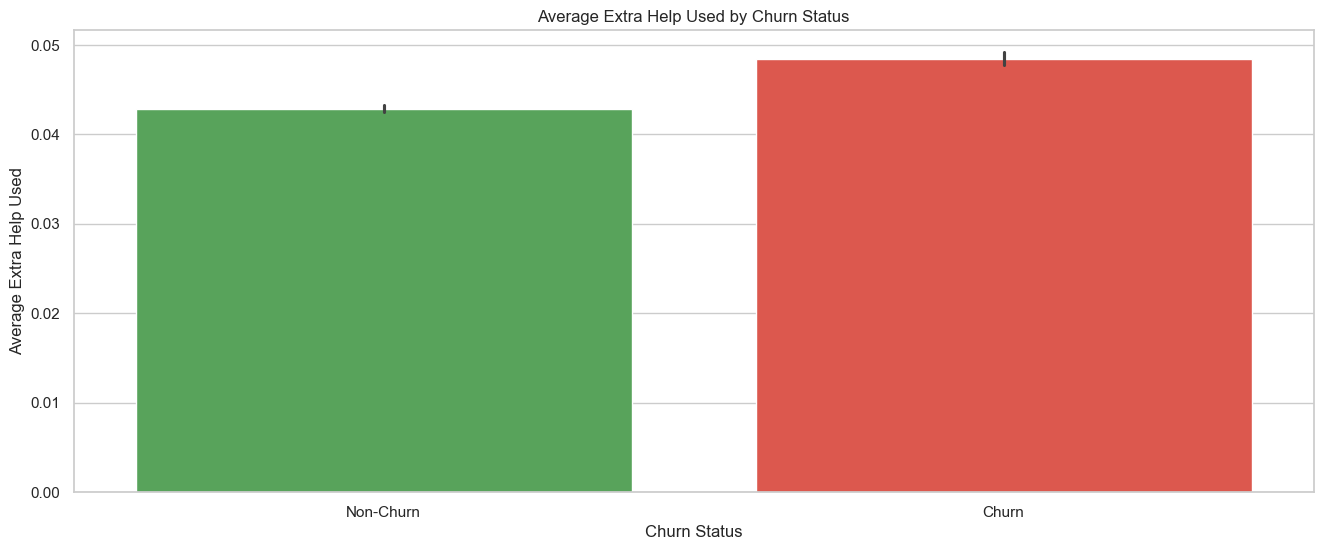

In [31]:
## Set figure size
plt.figure(figsize=(16, 6))

# Create a bar plot for average extra help used by churn status
sns.barplot(x='label', y='extra_help_used', data=df, palette=['#4CAF50', '#F44336'])

# Set plot attributes
plt.title('Average Extra Help Used by Churn Status')  # Set plot title
plt.xlabel('Churn Status')  # Set x-axis label
plt.ylabel('Average Extra Help Used')  # Set y-axis label
plt.xticks(ticks=[0, 1], labels=['Non-Churn', 'Churn'])  # Set x-axis tick labels

# Display the plot
plt.show()

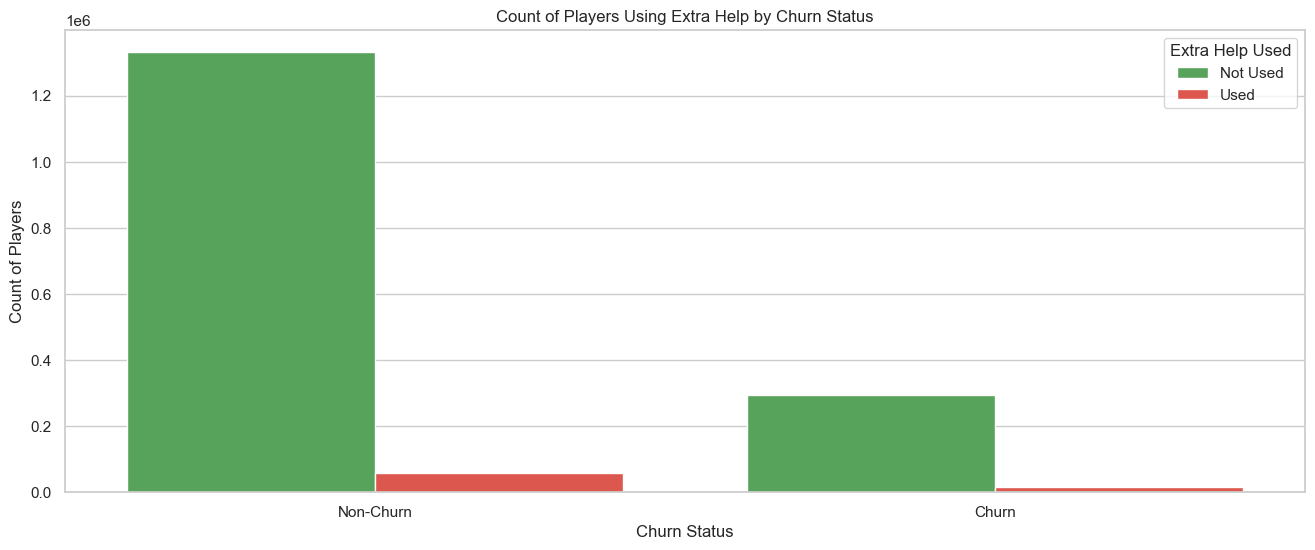

In [32]:
plt.figure(figsize=(16, 6))  # Set figure size

# Create a count plot for extra help used by churn status
sns.countplot(x='label', hue='extra_help_used', data=df, palette=['#4CAF50', '#F44336'])

# Set plot attributes
plt.title('Count of Players Using Extra Help by Churn Status')  # Set plot title
plt.xlabel('Churn Status')  # Set x-axis label
plt.ylabel('Count of Players')  # Set y-axis label
plt.xticks(ticks=[0, 1], labels=['Non-Churn', 'Churn'])  # Set x-axis tick labels

# Display the plot
plt.legend(title='Extra Help Used', loc='upper right', labels=['Not Used', 'Used'])
plt.show()

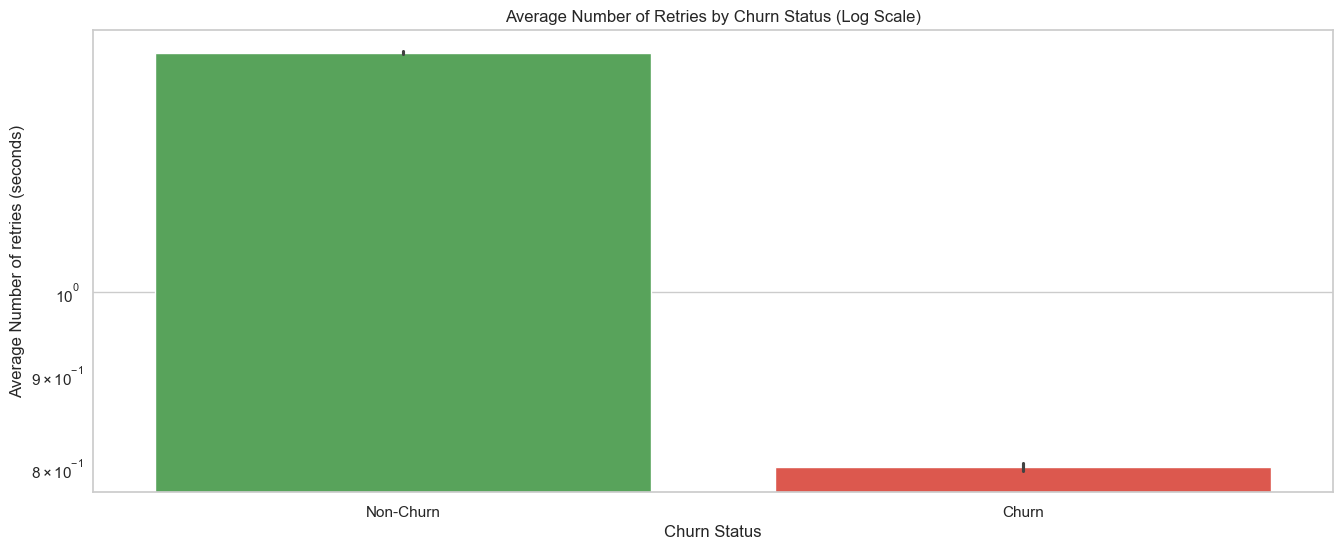

In [34]:
# 2. Distribution of num of retries for churn vs non-churn
plt.figure(figsize=(16, 6))  # Set figure size
sns.barplot(x='label', y='avg_num_retries', data=df, palette=['#4CAF50', '#F44336'])

# Set plot attributes
plt.yscale('log')  # Log scale to handle skewness
plt.title('Average Number of Retries by Churn Status (Log Scale)')  # Set plot title
plt.xlabel('Churn Status')  # Set x-axis label
plt.ylabel('Average Number of retries (seconds)')  # Set y-axis label
plt.xticks(ticks=[0, 1], labels=['Non-Churn', 'Churn'])  # Set x-axis tick labels

# Display the plot
plt.show()

In [22]:
#checking how many times each distinct user attempted a level
attempts_per_level = df.groupby(['user_id', 'level_id']).size().sort_values(ascending=False).reset_index(name='attempts_per_level')
attempts_per_level

,user_id,level_id,attempts_per_level
0,8523,262,143
1,8185,198,135
2,10396,153,131
3,12517,189,129
4,11130,245,112
...,...,...,...
902323,8290,71,1
902324,8290,72,1
902325,4587,93,1
902326,4587,92,1


In [36]:
# Total attempts per user
total_attempts = df.groupby('user_id')['attempt_result'].count().reset_index(name='total_attempts')
print("Total Attempts:")
print(total_attempts)

# Successful attempts (where attempt_result is 1)
successful_attempts = df[df['attempt_result'] == 1].groupby('user_id')['attempt_result'].count().reset_index(name='successful_attempts')
print("\nSuccessful Attempts:")
print(successful_attempts)

# Merging both counts on user_id
completion_data = pd.merge(total_attempts, successful_attempts, on='user_id', how='left')
print("\nCompletion Data after Merge:")
print(completion_data)

# Filling any NaN in successful_attempts with 0 (users who never completed a level)
completion_data['successful_attempts'] = completion_data['successful_attempts'].fillna(0)

# Completion rate
completion_data['completion_rate'] = completion_data['successful_attempts'] / completion_data['total_attempts']

# Output Completion Data
print("\nFinal Completion Data:")
print(completion_data)

# Displaying total attempts and successful attempts in a summarized way
total_attempts_count = total_attempts['total_attempts'].sum()
successful_attempts_count = successful_attempts['successful_attempts'].sum()

print("\nSummary:")
print(f"Total Attempts = {total_attempts_count}")
print(f"Total Successful Attempts = {successful_attempts_count}")
print(f"Overall Completion Rate = {successful_attempts_count / total_attempts_count:.2%}")  # Displays as percentage


Total Attempts:
       user_id  total_attempts
0         2774             212
1         2775             109
2         2776              69
3         2777             278
4         2778             137
...        ...             ...
10811    13585             238
10812    13586             310
10813    13587              20
10814    13588              28
10815    13589              21

[10816 rows x 2 columns]

Successful Attempts:
       user_id  successful_attempts
0         2774                  133
1         2775                   80
2         2776                   44
3         2777                  144
4         2778                  100
...        ...                  ...
10797    13585                  108
10798    13586                  139
10799    13587                   14
10800    13588                   27
10801    13589                   17

[10802 rows x 2 columns]

Completion Data after Merge:
       user_id  total_attempts  successful_attempts
0         2774          

In [37]:
# Calculating Average Attempt Duration per User
avg_attempt_duration = df.groupby('user_id')['attempt_duration'].mean().reset_index(name='avg_attempt_duration')
print("\nAverage Attempt Duration per User:")
print(avg_attempt_duration)

# How frequent do the users require help
help_count = df.groupby('user_id')['extra_help_used'].sum().reset_index(name='help_count')
print("\nHelp Count per User:")
print(help_count)

# How many retries each user has
total_retries = df.groupby('user_id')['avg_num_retries'].sum().reset_index(name='avg_num_retries')
print("\nTotal Retries per User:")
print(total_retries)

# Summary of averages
print("\nSummary:")
print(f"Total Users = {avg_attempt_duration['user_id'].nunique()}")
print(f"Average Attempt Duration Across All Users = {avg_attempt_duration['avg_attempt_duration'].mean():.2f} seconds")
print(f"Total Help Used Across All Users = {help_count['help_count'].sum()}")
print(f"Total Average Retries Across All Users = {total_retries['avg_num_retries'].sum()}")



Average Attempt Duration per User:
       user_id  avg_attempt_duration
0         2774            118.221698
1         2775            169.091743
2         2776             88.681159
3         2777            142.338129
4         2778            179.167883
...        ...                   ...
10811    13585            109.773109
10812    13586            125.048387
10813    13587            109.750000
10814    13588             75.642857
10815    13589             66.809524

[10816 rows x 2 columns]

Help Count per User:
       user_id  help_count
0         2774          18
1         2775          13
2         2776           1
3         2777           4
4         2778           9
...        ...         ...
10811    13585          10
10812    13586          16
10813    13587           0
10814    13588           0
10815    13589           0

[10816 rows x 2 columns]

Total Retries per User:
       user_id  avg_num_retries
0         2774       134.894670
1         2775        34.515598
2

## Data Transformation and Feature Engineering

In [38]:
# -------------------------- Data Transformation and Feature Engineering --------------------------


# Setting target variable and features
y = df['label']
X = df.drop(columns = ['time','user_id','month','day','label'], axis = 1)


# Check unique values in y
print("Unique values in target variable y:", y.unique())

# Convert continuous target into binary classification if necessary
# In this case, 'label' is already binary (0 or 1), so we can directly use it
if y.dtype != 'int':
    threshold_value = 0  # Define your threshold for conversion
    y_binary = (y > threshold_value).astype(int)  # Convert to binary
else:
    y_binary = y.astype(int)  # Already binary

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Handle class imbalance using SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_scaled, y_binary)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.3, random_state=42, stratify=y_resampled)

# Final checks on the shapes of the datasets
print("Training set shape:", X_train.shape, y_train.shape)
print("Testing set shape:", X_test.shape, y_test.shape)

Unique values in target variable y: [0. 1.]
Training set shape: (1948241, 10) (1948241,)
Testing set shape: (834961, 10) (834961,)


In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1699820 entries, 0 to 1755674
Data columns (total 15 columns):
 #   Column                  Dtype         
---  ------                  -----         
 0   user_id                 int64         
 1   level_id                int64         
 2   attempt_result          int64         
 3   attempt_duration        float64       
 4   f_reststep              float64       
 5   extra_help_used         int64         
 6   time                    datetime64[ns]
 7   avg_attempt_duration    float64       
 8   avg_clearance_rate      float64       
 9   avg_clearance_duration  float64       
 10  avg_num_retries         float64       
 11  label                   float64       
 12  year                    int32         
 13  month                   int32         
 14  day                     int32         
dtypes: datetime64[ns](1), float64(7), int32(3), int64(4)
memory usage: 188.0 MB


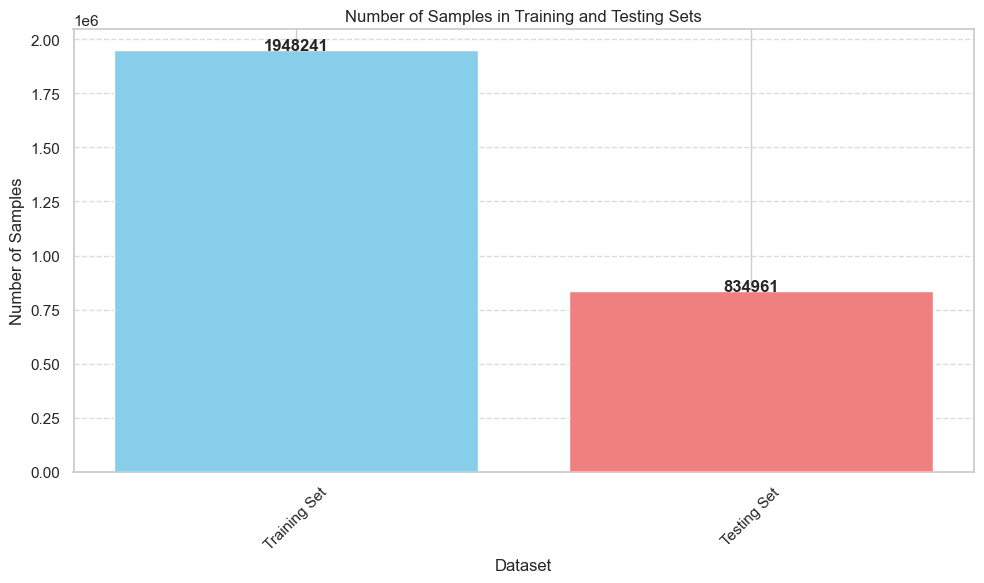

In [39]:
# -------------------------- Visualisation --------------------------
# Data
datasets = ['Training Set', 'Testing Set']
samples = [X_train.shape[0], X_test.shape[0]]

# Create bar plot
plt.figure(figsize=(10, 6))
plt.bar(datasets, samples, color=['skyblue', 'lightcoral'])
plt.title('Number of Samples in Training and Testing Sets')
plt.xlabel('Dataset')
plt.ylabel('Number of Samples')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the value on top of the bars
for i, v in enumerate(samples):
    plt.text(i, v + 2000, str(v), ha='center', fontweight='bold')

plt.tight_layout()
plt.show()

## Model Selection, Model Training and Model Evaluation

#### Choosing Individual models
To aid in the churn diagnosis, 3 different models will be used. They are; Logistic Regression, Gradient Boost,Random Forest Classifier

In [40]:
# -------------------------- Model Selection --------------------------

# Define candidate models
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000, random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42),
}

# DataFrame to store the results
results = pd.DataFrame(columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])

# Training each model and evaluating
for name, model in models.items():
    # Fit the model on the training data
    model.fit(X_train, y_train)
    
    # Make predictions on the test set
    y_pred = model.predict(X_test)
    
    # Calculate evaluation metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    
    # Append results to the DataFrame
    results = pd.concat([results, pd.DataFrame({'Model': [name], 'Accuracy': [accuracy], 
                                                'Precision': [precision], 'Recall': [recall], 
                                                'F1 Score': [f1]})], ignore_index=True)

# Display the results
print(results)

# Optionally: Display confusion matrix for the best performing model
best_model_name = results.loc[results['F1 Score'].idxmax(), 'Model']
best_model = models[best_model_name]
y_best_pred = best_model.predict(X_test)

conf_matrix = confusion_matrix(y_test, y_best_pred)
print(f"Confusion Matrix for {best_model_name}:\n", conf_matrix)
print("\nClassification Report:\n", classification_report(y_test, y_best_pred))

                 Model  Accuracy  Precision    Recall  F1 Score
0  Logistic Regression  0.607809   0.602324  0.634608  0.618045
1        Random Forest  0.712704   0.728110  0.678933  0.702662
2    Gradient Boosting  0.624368   0.626392  0.616358  0.621335
Confusion Matrix for Random Forest:
 [[311639 105842]
 [134039 283441]]

Classification Report:
               precision    recall  f1-score   support

           0       0.70      0.75      0.72    417481
           1       0.73      0.68      0.70    417480

    accuracy                           0.71    834961
   macro avg       0.71      0.71      0.71    834961
weighted avg       0.71      0.71      0.71    834961



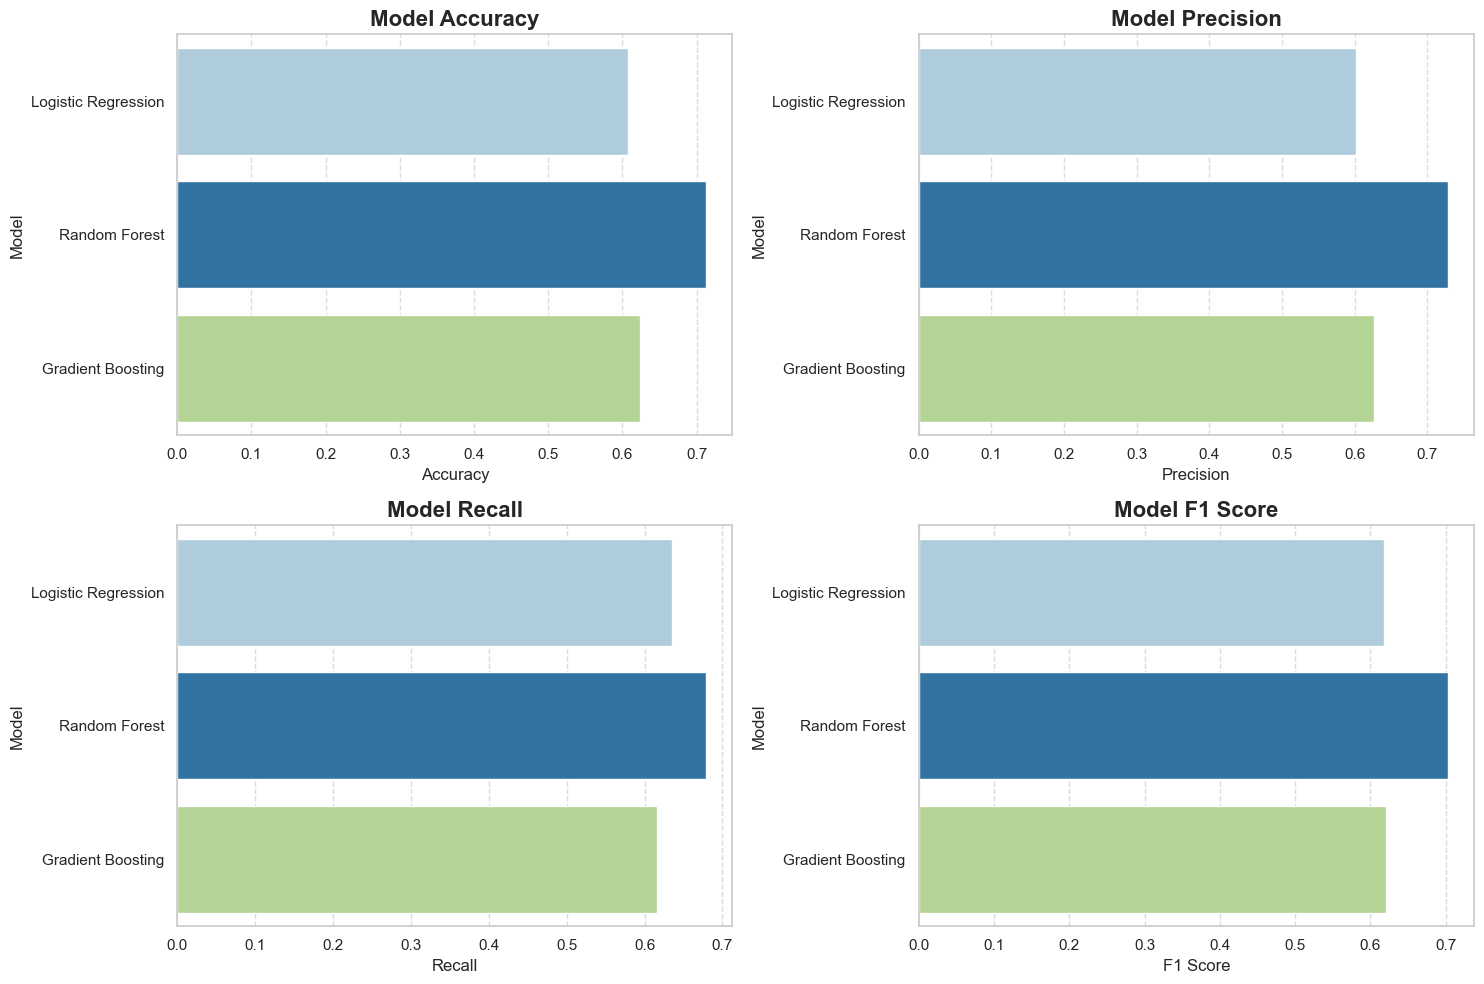

In [41]:
# -------------------------- Visualise Results --------------------------

# Set the style of seaborn for a more professional look
sns.set(style="whitegrid", palette="muted")

# Create a color palette
colors = sns.color_palette("Paired")

# Create a figure with subplots
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Model Accuracy
sns.barplot(x='Accuracy', y='Model', data=results, ax=axes[0, 0], palette=colors)
axes[0, 0].set_title('Model Accuracy', fontsize=16, weight='bold')
axes[0, 0].set_xlabel('Accuracy', fontsize=12)
axes[0, 0].set_ylabel('Model', fontsize=12)

# Model Precision
sns.barplot(x='Precision', y='Model', data=results, ax=axes[0, 1], palette=colors)
axes[0, 1].set_title('Model Precision', fontsize=16, weight='bold')
axes[0, 1].set_xlabel('Precision', fontsize=12)
axes[0, 1].set_ylabel('Model', fontsize=12)

# Model Recall
sns.barplot(x='Recall', y='Model', data=results, ax=axes[1, 0], palette=colors)
axes[1, 0].set_title('Model Recall', fontsize=16, weight='bold')
axes[1, 0].set_xlabel('Recall', fontsize=12)
axes[1, 0].set_ylabel('Model', fontsize=12)

# Model F1 Score
sns.barplot(x='F1 Score', y='Model', data=results, ax=axes[1, 1], palette=colors)
axes[1, 1].set_title('Model F1 Score', fontsize=16, weight='bold')
axes[1, 1].set_xlabel('F1 Score', fontsize=12)
axes[1, 1].set_ylabel('Model', fontsize=12)

# Adding grid lines for better readability
for ax in axes.flat:
    ax.grid(axis='x', linestyle='--', alpha=0.7)

# Adjust layout for better spacing
plt.tight_layout()
plt.show()

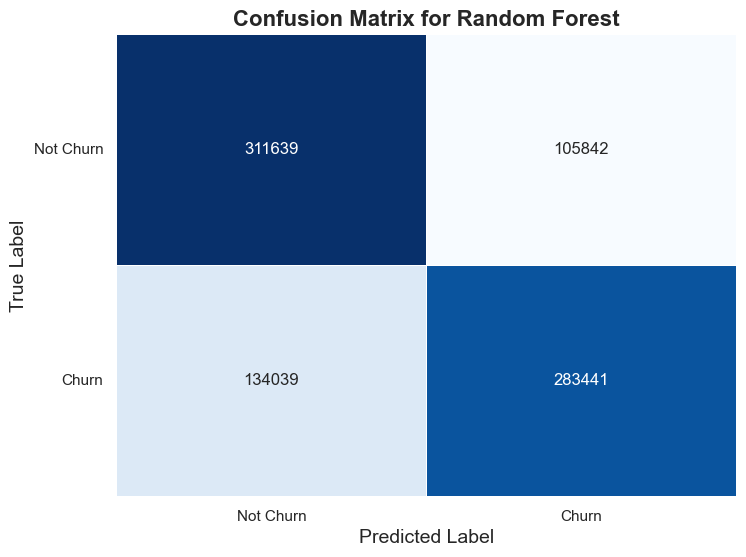

In [43]:
# -------------------------- Confusion Matrix Visualisation --------------------------
# Plot the confusion matrix for the best performing model (Random Forest in this case)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Not Churn', 'Churn'], yticklabels=['Not Churn', 'Churn'], linewidths=.5)

plt.xlabel('Predicted Label', fontsize=14)
plt.ylabel('True Label', fontsize=14)
plt.title(f'Confusion Matrix for {best_model_name}', fontsize=16, weight='bold')
plt.xticks(rotation=0)
plt.yticks(rotation=0)
plt.show()

## Model Deployment

In [55]:
# Create the 'model' directory if it doesn't exist
if not os.path.exists('model'):
    os.makedirs('model')

# Save the trained model
joblib.dump(best_model, 'model/churn_model.pkl')

['model/churn_model.pkl']

In [56]:
# Load the trained model
loaded_model = joblib.load('model/churn_model.pkl')

In [57]:
model_path = 'model/churn_model.pkl'
if os.path.exists(model_path):
    loaded_model = joblib.load(model_path)
else:
    print(f"Model file not found: {model_path}")
